# House Prices: Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Description

#### Start here if...
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

#### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. !

## Evaluation

#### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

#### Submission File Format
The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
You can download an example submission file (sample_submission.csv) on the Data page.

## Let's get stated!

In [1]:
## load the library

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno

### Load the datasets

In [2]:
url_train = "https://raw.githubusercontent.com/lucastiagooliveira/lucastiagooliveira/master/Kaggle/house-prices-advanced-regression-techniques/train.csv"
url_test = "https://raw.githubusercontent.com/lucastiagooliveira/lucastiagooliveira/master/Kaggle/house-prices-advanced-regression-techniques/test.csv"

In [3]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [4]:
combine = [df_train, df_test]

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(df_train.head().info())
print('_'*50)
print(df_test.head().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5 non-null      int64  
 1   MSSubClass     5 non-null      int64  
 2   MSZoning       5 non-null      object 
 3   LotFrontage    5 non-null      float64
 4   LotArea        5 non-null      int64  
 5   Street         5 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       5 non-null      object 
 8   LandContour    5 non-null      object 
 9   Utilities      5 non-null      object 
 10  LotConfig      5 non-null      object 
 11  LandSlope      5 non-null      object 
 12  Neighborhood   5 non-null      object 
 13  Condition1     5 non-null      object 
 14  Condition2     5 non-null      object 
 15  BldgType       5 non-null      object 
 16  HouseStyle     5 non-null      object 
 17  OverallQual    5 non-null      int64  
 18  OverallCond   

### Print the dependent variable

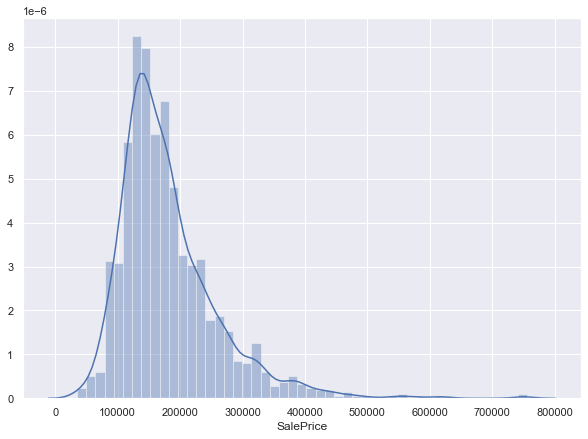

In [33]:
sns.set()

sns.distplot(df_train.SalePrice, color = 'b')

In [36]:
print('Skewness: %f' % df_train.SalePrice.skew())
print('Kurtosis: %f' % df_train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Separation the type - Between: quantitative and qualitative

In [9]:
quant = [i for i in df_train.columns if df_train[i].dtypes != object]
quali = [i for i in df_train.columns if df_train[i].dtypes == object]

quant.remove('Id')
quant.remove('SalePrice')

# quant = df_train[quant]
# quali = df_train[quali]

target = df_train.SalePrice

### Print variable

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

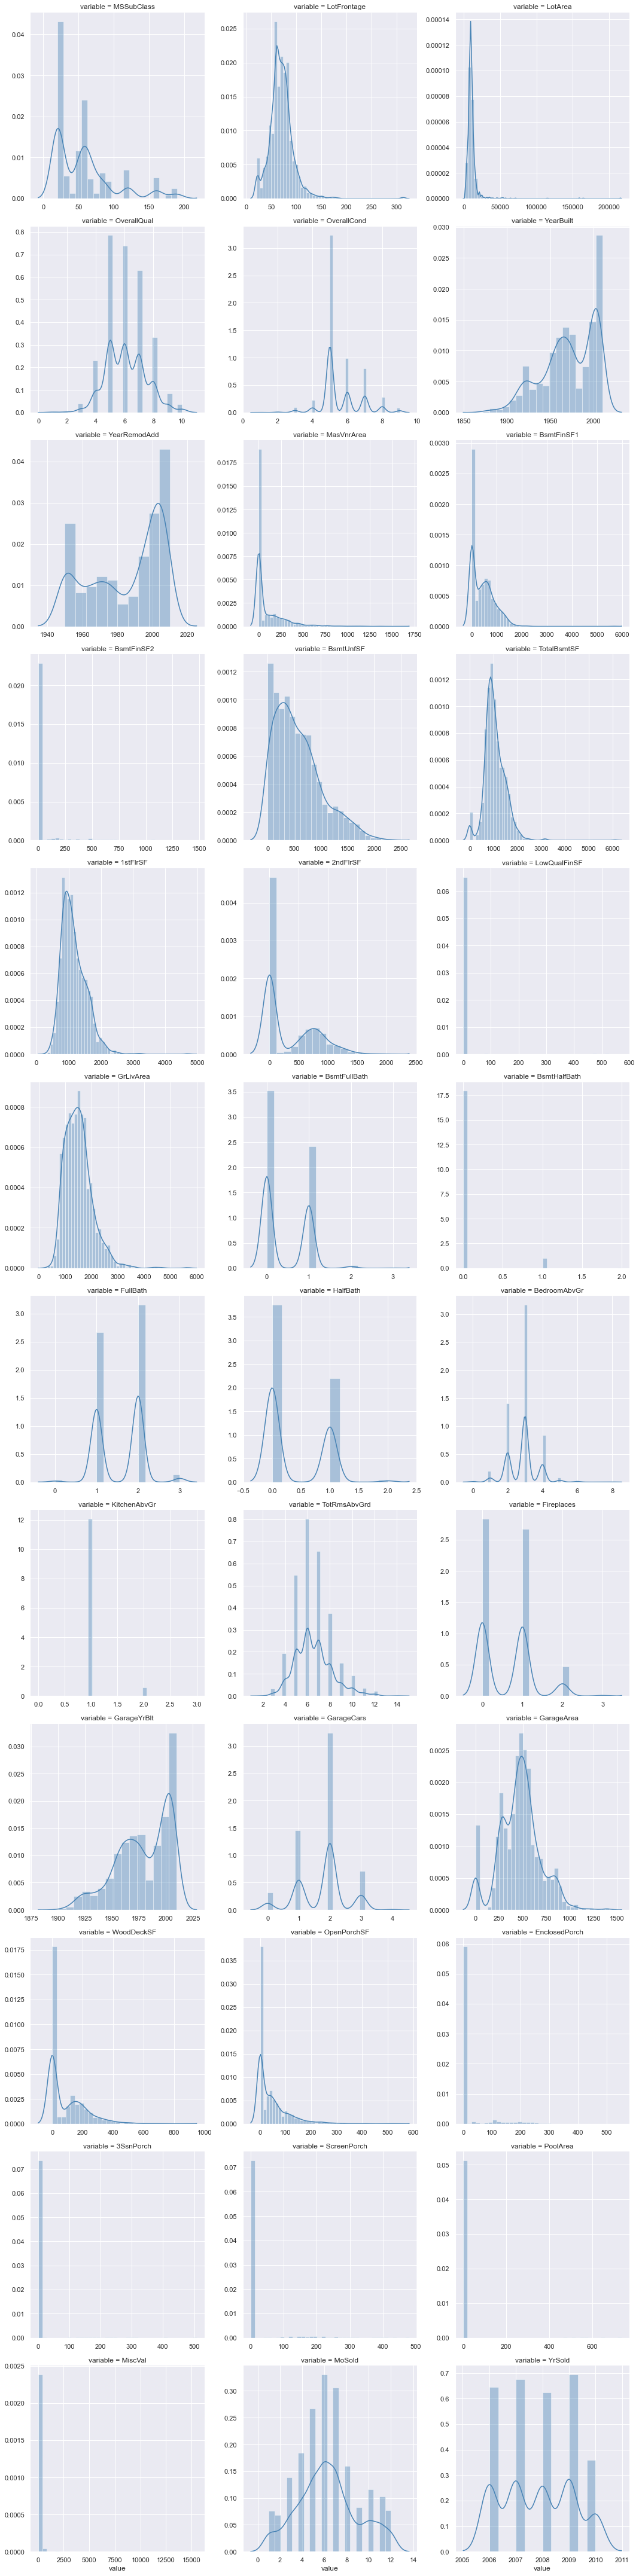

In [10]:
# Print quantitative varibles

sns.set(style="darkgrid")

melted = pd.melt(df_train, value_vars= quant)

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 3, sharex = False, sharey = False, height = 5)

g.map(sns.distplot, "value", color="steelblue")

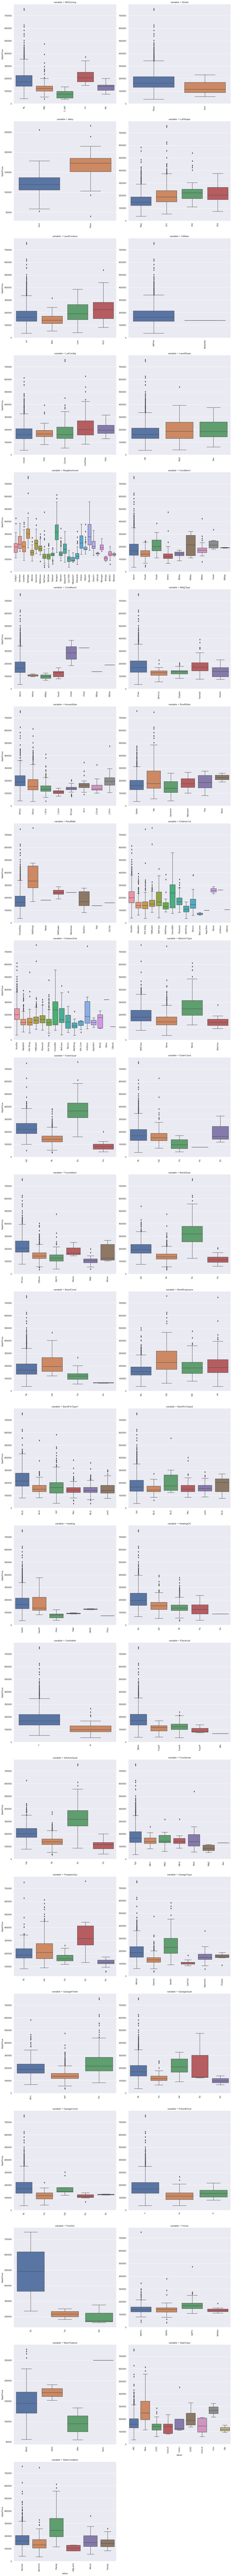

In [11]:
# Print qualitative varibles

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation = 90)
sns.set()

melted = pd.melt(df_train, value_vars= quali, id_vars = ['SalePrice'])

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 2, sharex = False, sharey = False, height = 8)

g.map(boxplot, 'value', 'SalePrice')


### Correlation with data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

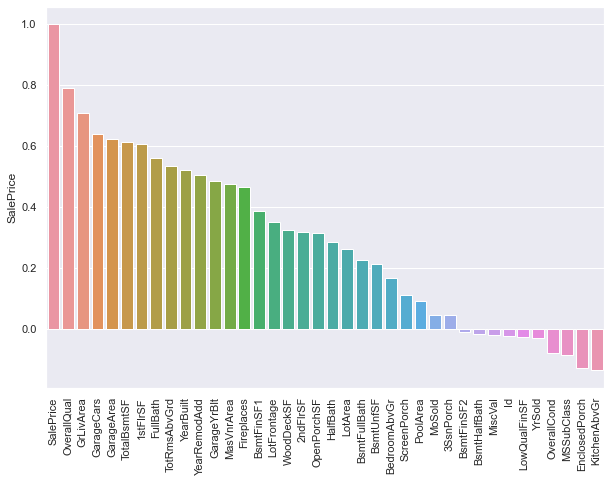

In [63]:
# sns.heatmap(df_train.corr())
sns.barplot(x = df_train.corr().SalePrice.sort_values(ascending = False).index ,y = df_train.corr().SalePrice.sort_values(ascending = False))
plt.xticks(rotation = 90)

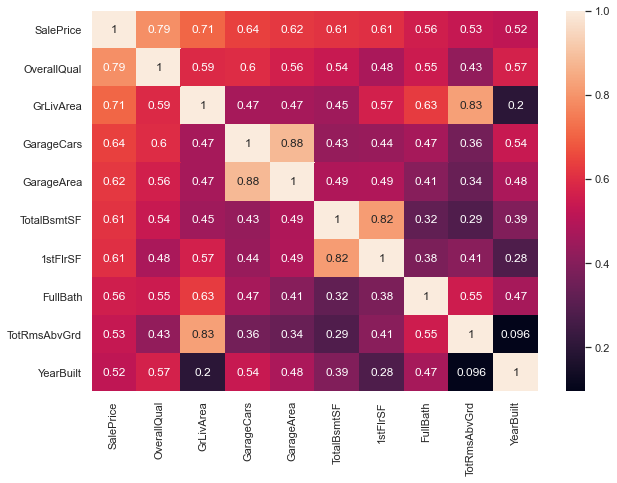

In [81]:
# The most correlated variable with price in your dataset
sns.heatmap(df_train[df_train.corr().SalePrice.sort_values(ascending = False).index[0:10]].corr(), annot = True)

### Missing values

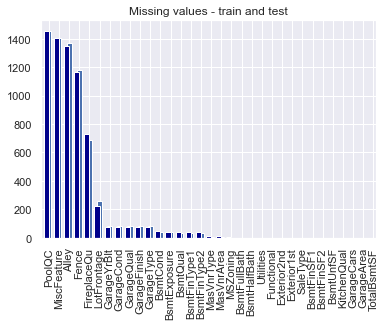

In [12]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True, ascending = False)
missing.plot.bar(title = 'Missing values - train and test')

missing_2 = df_test.isnull().sum()
missing_2= missing_2[missing_2 > 0]
missing_2.sort_values(inplace = True, ascending = False)
missing_2.plot.bar(title = 'Missing values - train and test',position = 1, color = 'darkblue')
plt.show()

#### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.

    - 20	1-STORY 1946 & NEWER ALL STYLES
    - 30	1-STORY 1945 & OLDER
    - 40	1-STORY W/FINISHED ATTIC ALL AGES
    - 45	1-1/2 STORY - UNFINISHED ALL AGES
    - 50	1-1/2 STORY FINISHED ALL AGES
    - 60	2-STORY 1946 & NEWER
    - 70	2-STORY 1945 & OLDER
    - 75	2-1/2 STORY ALL AGES
    - 80	SPLIT OR MULTI-LEVEL
    - 85	SPLIT FOYER
    - 90	DUPLEX - ALL STYLES AND AGES
    - 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    - 150 1-1/2 STORY PUD - ALL AGES
    - 160 2-STORY PUD - 1946 & NEWER
    - 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    - 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

(2,)


Text(0.5, 1.0, 'Test dataframe')

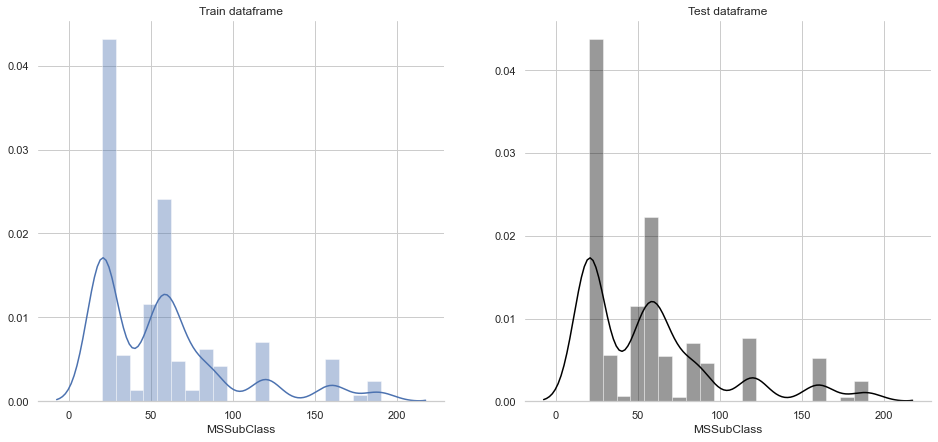

In [13]:
sns.set(style="whitegrid", palette='Blues_r', color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1,2 , figsize=(16, 7))
sns.despine(left=True)

print(axes.shape)

# Plot a simple histogram for df_train
sns.distplot(df_train.MSSubClass, color="b", ax = axes[0])

# Plot a simple histogram for df_test
sns.distplot(df_test.MSSubClass, color="black", ax = axes[1])

axes[0].set_title('Train dataframe')
axes[1].set_title('Test dataframe')

### Ploting the data MSSubClass

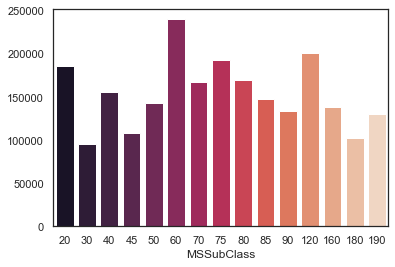

In [14]:
sns.set(style="white")
x = df_train[['MSSubClass','SalePrice']].groupby(by = 'MSSubClass').mean().index
y = df_train[['MSSubClass','SalePrice']].groupby(by = 'MSSubClass').mean().values
y = np.ravel(y)
sns.barplot(x= x,y= y, palette = 'rocket')


(2,)


Text(0.5, 1.0, 'Quantity of sales per MSSubClass')

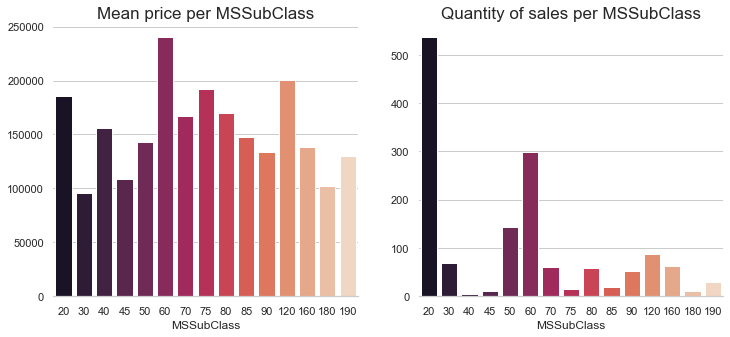

In [15]:
sns.set(style="whitegrid", palette='Blues_r', color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1,2 , figsize=(12,5))
sns.despine(left=True)

print(axes.shape)

x = df_train[['MSSubClass','SalePrice']].groupby(by = 'MSSubClass').mean().index
y = df_train[['MSSubClass','SalePrice']].groupby(by = 'MSSubClass').mean().values
y = np.ravel(y)
# Plot a simple histogram for df_train
sns.barplot(x= x,y= y, palette = 'rocket', ax = axes[0])

y_1 = np.ravel(df_train[['MSSubClass','SalePrice']].groupby(by = 'MSSubClass').count().values)
# Plot a simple histogram for df_test
sns.barplot(x= x,y= y_1, palette = 'rocket', ax = axes[1])

axes[0].set_title('Mean price per MSSubClass', size = 17)
axes[1].set_title('Quantity of sales per MSSubClass', size = 17)

### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

(2,)


Text(0.5, 1.0, 'Quantity of sales per MSZoning')

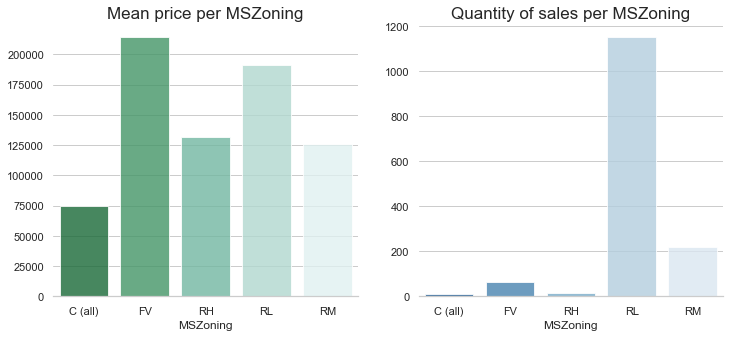

In [16]:
sns.set(style="whitegrid", palette='Blues', color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1,2 , figsize=(12, 5))
sns.despine(left=True)

print(axes.shape)

x = df_train[['MSZoning','SalePrice']].groupby(by = 'MSZoning').mean().index
y = df_train[['MSZoning','SalePrice']].groupby(by = 'MSZoning').mean().values
y = np.ravel(y)
# Plot a simple barplot for df_train
sns.barplot(x= x,y= y, palette = 'BuGn_r', ax = axes[0], alpha = 0.8)

y_1 = np.ravel(df_train[['MSZoning','SalePrice']].groupby(by = 'MSZoning').count().values)
# Plot a simple barplot for df_test
sns.barplot(x= x,y= y_1, palette = 'Blues_r', ax = axes[1], alpha = 0.8)

axes[0].set_title('Mean price per MSZoning', size = 17)
axes[1].set_title('Quantity of sales per MSZoning', size = 17)

### LotFrontage: Linear feet of street connected to property

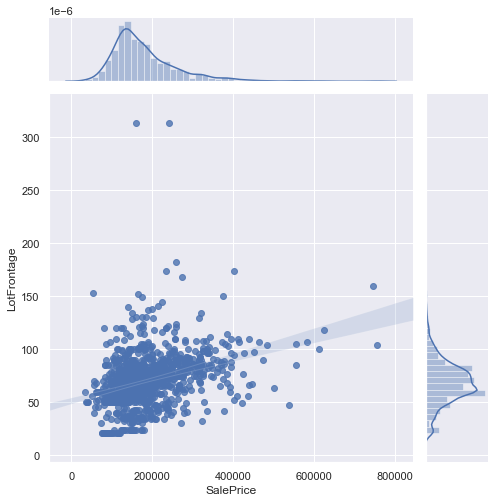

In [17]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("SalePrice","LotFrontage", data=df_train,
                  kind="reg", truncate=False,
                  color="b", height=7)

### LotArea: Lot size in square feet

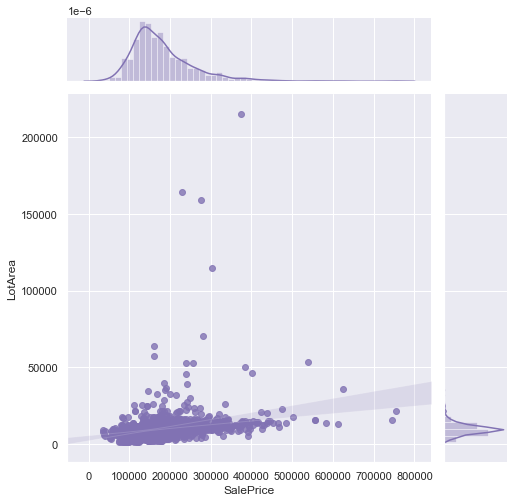

In [18]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("SalePrice", "LotArea",  data=df_train,
                  kind="reg", truncate=False,
                  color="m", height=7)

### Street: Type of road access to property

    Grvl	Gravel	
    Pave	Paved

(2,)
        SalePrice
Street           
Grvl            6
Pave         1454


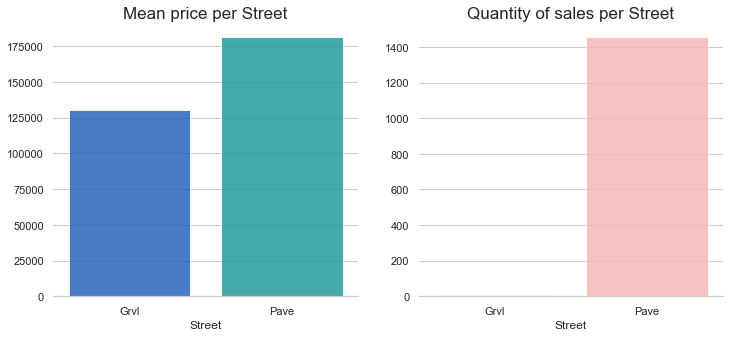

In [19]:
sns.set(style="whitegrid", palette='Blues', color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1,2 , figsize=(12, 5))
sns.despine(left=True)

print(axes.shape)

x = df_train[['Street','SalePrice']].groupby(by = 'Street').mean().index
y = df_train[['Street','SalePrice']].groupby(by = 'Street').mean().values
y = np.ravel(y)
# Plot a simple barplot for df_train
sns.barplot(x= x,y= y, palette = 'winter', ax = axes[0], alpha = 0.8)

y_1 = np.ravel(df_train[['Street','SalePrice']].groupby(by = 'Street').count().values)
# Plot a simple barplot for df_test
sns.barplot(x= x,y= y_1, palette = 'bwr', ax = axes[1], alpha = 0.8)

axes[0].set_title('Mean price per Street', size = 17)
axes[1].set_title('Quantity of sales per Street', size = 17)

print(df_train[['Street','SalePrice']].groupby(by = 'Street').count())

### Alley: Type of alley access to property
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

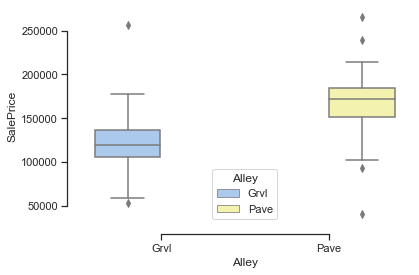

In [20]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show 
sns.boxplot(x="Alley", y="SalePrice",
            hue="Alley", palette=["b", 'y'],
            data=df_train)
sns.despine(offset=10, trim=True)

### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

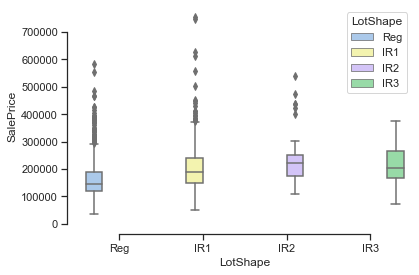

In [21]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show 
sns.boxplot(x="LotShape", y="SalePrice",
            hue="LotShape", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=10, trim=True)

### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

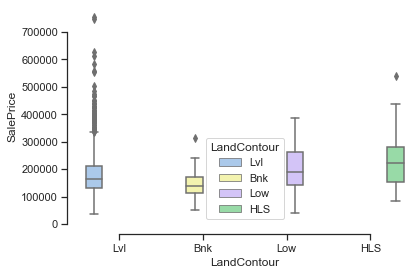

In [22]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show 
sns.boxplot(x="LandContour", y="SalePrice",
            hue="LandContour", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=10, trim=True)

### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [23]:
df_train[['Utilities','SalePrice']].groupby(by = 'Utilities').mean().T

Utilities,AllPub,NoSeWa
SalePrice,180950.95682,137500.0


In [24]:
df_train[['Utilities','SalePrice']].groupby(by = 'Utilities').count().T

Utilities,AllPub,NoSeWa
SalePrice,1459,1


In [25]:
df_test[['Utilities','Id']].groupby(by = 'Utilities').count().T

Utilities,AllPub
Id,1457


- Likely the utilities shouldn't importante for the regression, because in train set 99,99 % of data is in 'AllPub' class and in test set 100%.

### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

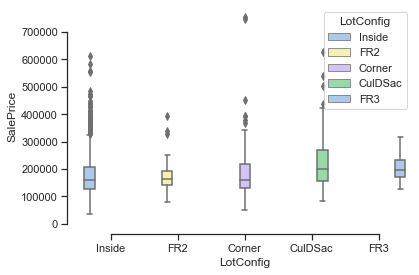

In [26]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show 
sns.boxplot(x="LotConfig", y="SalePrice",
            hue="LotConfig", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=10, trim=True)

### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

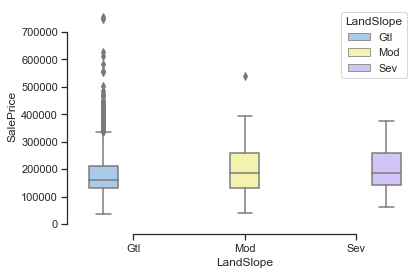

In [27]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show 
sns.boxplot(x="LandSlope", y="SalePrice",
            hue="LandSlope", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=10, trim=True)

### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [28]:
df_train[['SalePrice','Neighborhood']].groupby(by = 'Neighborhood').describe()

SalePrice                                                     \
                 count           mean            std       min        25%   
Neighborhood                                                                
Blmngtn           17.0  194870.882353   30393.229219  159895.0  174000.00   
Blueste            2.0  137500.000000   19091.883092  124000.0  130750.00   
BrDale            16.0  104493.750000   14330.176493   83000.0   91000.00   
BrkSide           58.0  124834.051724   40348.689270   39300.0  100500.00   
ClearCr           28.0  212565.428571   50231.538993  130000.0  183750.00   
CollgCr          150.0  197965.773333   51403.666438  110000.0  152958.75   
Crawfor           51.0  210624.725490   68866.395472   90350.0  159250.00   
Edwards          100.0  128219.700000   43208.616459   58500.0  101500.00   
Gilbert           79.0  192854.506329   35986.779085  141000.0  174000.00   
IDOTRR            37.0  100123.783784   33376.710117   34900.0   81000.00   
MeadowV           17.0   98576.470588   23491.049610   75000.0   83500.00   
Mitchel           49.0  156270.122449   36486.625334   84500.0  131000.00   
NAmes            225.0  145847.080000   33075.345450   87500.0  127500.00   
NPkVill            9.0  142694.444444    9377.314529  127500.0  140000.00   
NWAmes            73.0  189050.068493   37172.218106   82500.0  165150.00   
NoRidge           41.0  335295.317073  121412.658640  190000.0  265000.00   
NridgHt           77.0  316270.623377   96392.544954  154000.0  253293.00   
OldTown          113.0  128225.300885   52650.583185   37900.0  105900.00   
SWISU             25.0  142591.360000   32622.917679   60000.0  128000.00   
Sawyer            74.0  136793.135135   22345.129157   62383.0  127250.00   
SawyerW           59.0  186555.796610   55651.997820   76000.0  145500.00   
Somerst           86.0  225379.837209   56177.555888  144152.0  177975.00   
StoneBr           25.0  310499.000000  112969.676640  170000.0  213500.00   
Timber            38.0  242247.447368   64845.651549  137500.0  186900.00   
Veenker           11.0  238772.727273   72369.317959  162500.0  184250.00   

                                             
                   50%        75%       max  
Neighborhood                                 
Blmngtn       191000.0  213490.00  264561.0  
Blueste       137500.0  144250.00  151000.0  
BrDale        106000.0  118000.00  125000.0  
BrkSide       124300.0  141175.00  223500.0  
ClearCr       200250.0  242225.00  328000.0  
CollgCr       197200.0  225725.00  424870.0  
Crawfor       200624.0  239000.00  392500.0  
Edwards       121750.0  145225.00  320000.0  
Gilbert       181000.0  197200.00  377500.0  
IDOTRR        103000.0  120500.00  169500.0  
MeadowV        88000.0  115000.00  151400.0  
Mitchel       153500.0  171000.00  271000.0  
NAmes         140000.0  158000.00  345000.0  
NPkVill       146000.0  148500.00  155000.0  
NWAmes        182900.0  205000.00  299800.0  
NoRidge       301500.0  341000.00  755000.0  
NridgHt       315000.0  374000.00  611657.0  
OldTown       119000.0  140000.00  475000.0  
SWISU         139500.0  160000.00  200000.0  
Sawyer        135000.0  149462.50  190000.0  
SawyerW       179900.0  222500.00  320000.0  
Somerst       225500.0  252919.50  423000.0  
StoneBr       278000.0  377426.00  556581.0  
Timber        228475.0  286115.75  378500.0  
Veenker       218000.0  282000.00  385000.0

### Conditions (1 and 2): Proximity to various conditions
	
       Artery Adjacent to arterial street
       Feedr Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

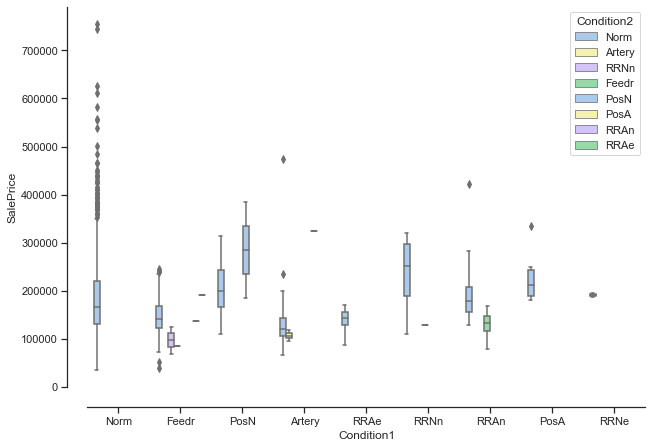

In [29]:
sns.set(style="ticks", palette="pastel", rc={'figure.figsize':(10,7)})
# fig, ax = plt.subplot(figsize = (16,7))
# Draw a nested boxplot to show 
sns.boxplot(x="Condition1", y="SalePrice",
            hue="Condition2", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=20, trim=False)

### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

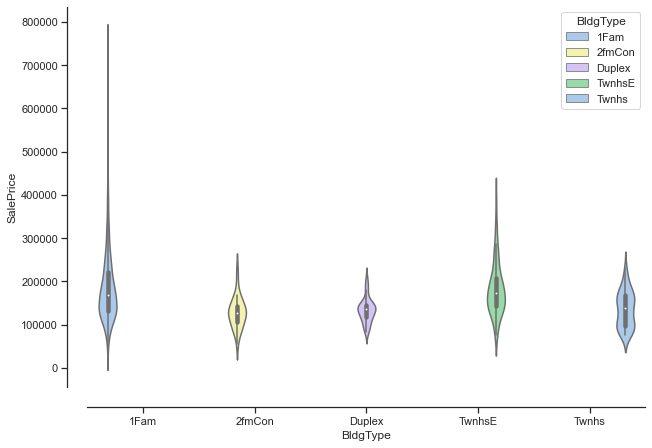

In [30]:
sns.set(style="ticks", palette="pastel", rc={'figure.figsize':(10,7)})
# fig, ax = plt.subplot(figsize = (16,7))
# Draw a nested boxplot to show 
sns.violinplot(x="BldgType", y="SalePrice",
            hue="BldgType", palette=["b", 'y', 'm','g'],
            data=df_train)
sns.despine(offset=20, trim=False)